In [1]:
import matplotlib.pyplot as plt
import numpy as np

import src
from Load_dataset import _load

In [1]:
# Скачивание и разархивация датасета, если требуется
_load()

In [2]:
progress_bar = src.progress_bar
cl = src.cl
process = src.process_

In [3]:
# Загрузка датасета из директории
X, Y = src.load()

len(X)

In [5]:
# mask = src.get_optic_mask()

segmentize = src.segmentize
predict = _predict = src.predict

# Обработать одно изображение

IoU: 0.8705978705978706


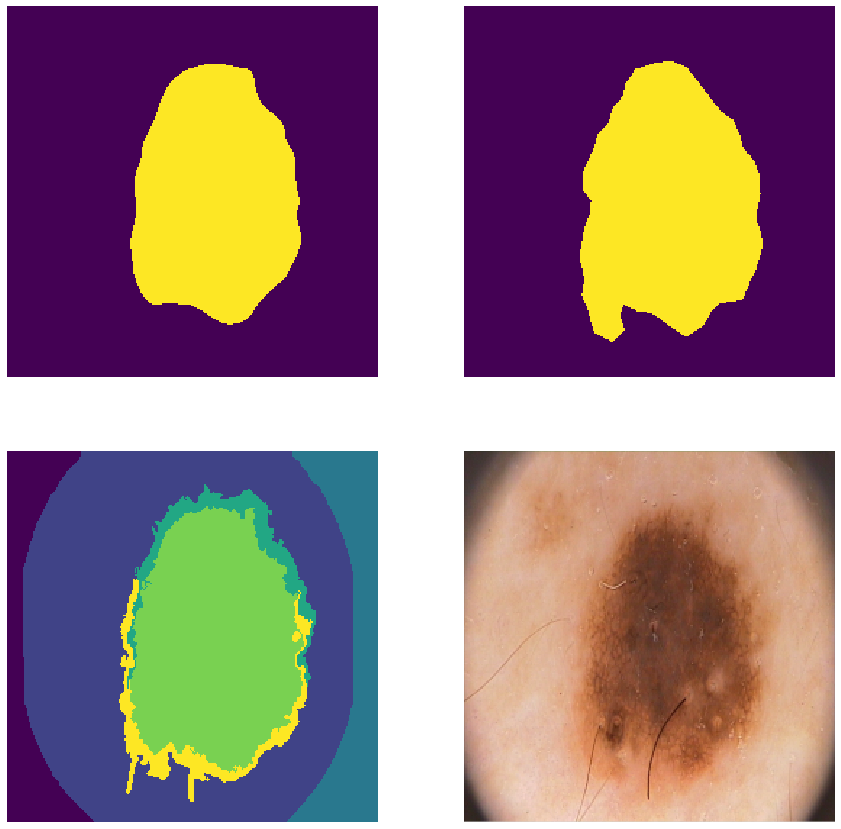

In [7]:
def process_one(_image, _eth):
    _image: np.ndarray = X[i]
    _eth: np.ndarray = Y[i]

    segmented, processed = segmentize(_image)
    # src.image_show_cl(segmented)
    pred, n_regions = predict(_image, segmented)
    iou = src.iou_np(pred, _eth)

    return iou, segmented, processed, pred


i = 0  # Индекс изображения в датасете
_image = X[i]
_eth = Y[i]
iou, segmented, processed, pred = process_one(_image, _eth)
src.plot_4([pred, _eth, segmented, _image])
print("IoU:", iou)

# Прогнать весь датасет
Можно задать ограничение в lim

In [9]:
lim = None

if lim is None: lim = len(X)

ious, preds = process(X, Y, lim=lim, div=7)

100%


Mean iou: 0.7431867861752042


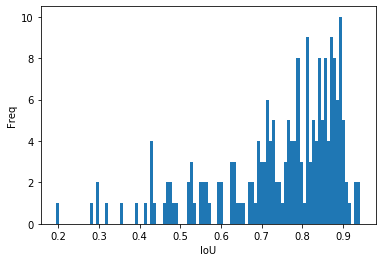

In [10]:
# Гистограмма распределения оценок IoU
plt.xlabel("IoU")
plt.ylabel("Freq")
plt.hist(ious, bins=100)

print("Mean iou:", ious.mean())
